In [25]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "house-prices-advanced-regression-techniques"

# Classification

* When we have classfication problem and output should be 1 or 0. Logistic regression fits best
* When we have to choose outpout as 1,2 or 3. In such cases, Linear Regression is not appropriate here. Multiclass Logistic Regression or Discriminant Analysis are more appropriate.

In [26]:
library(ISLR)
require(ISLR)
library(MASS)
require(MASS)

In [27]:
?Smarket

Smarket {ISLR},R Documentation


## Linear Discriminant Analysis

In [28]:
lda.fit=lda(Direction~Lag1+Lag2,data=Smarket,subset=Year<2005)
lda.fit

Call:
lda(Direction ~ Lag1 + Lag2, data = Smarket, subset = Year < 
    2005)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

Coefficients of linear discriminants:
            LD1
Lag1 -0.6420190
Lag2 -0.5135293

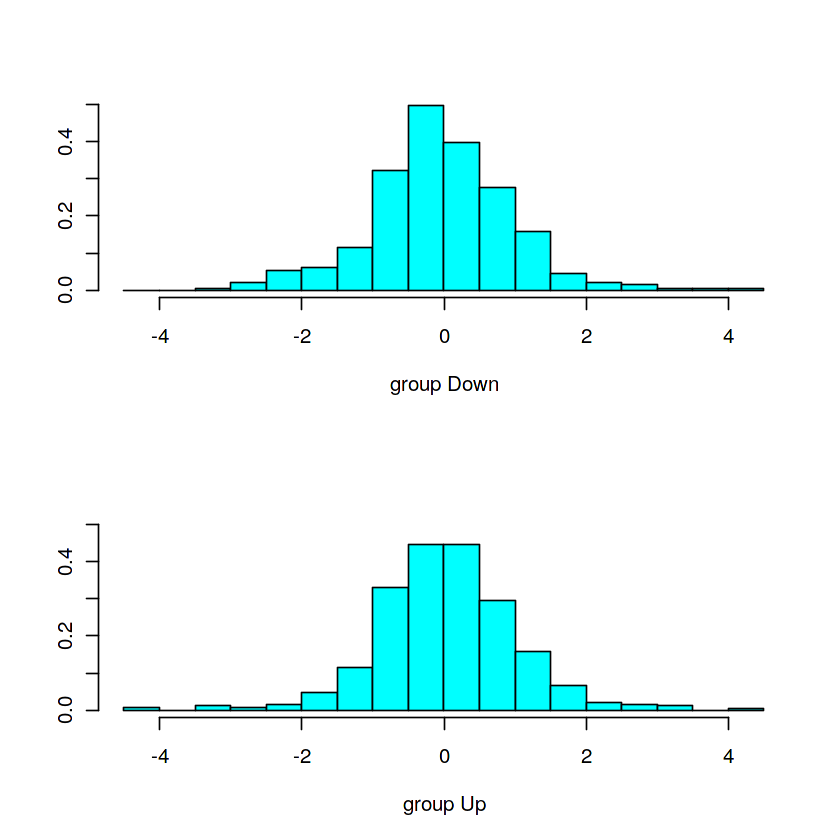

In [29]:
plot(lda.fit)

In [30]:
# Now predicting for year == 2005

#creating Subset with year ==2005
Smarket.2005 = subset(Smarket,Year=2005)
lda.pred=predict(lda.fit,Smarket.2005)

#knowing format of our output
class(lda.pred)

[1] "list"

In [31]:
# knowing first 5 rows of list
data.frame(lda.pred)[1:5,]

,class,posterior.Down,posterior.Up,LD1
,<fct>,<dbl>,<dbl>,<dbl>
1,Up,0.4950989,0.5049011,-0.14500300
2,Down,0.5094612,0.4905388,-0.81034228
3,Down,0.5168756,0.4831244,-1.15402959
4,Up,0.4947529,0.5052471,-0.12897571
5,Up,0.4935503,0.5064497,-0.07326231


In [32]:
# Now let's compare our predictions vs Real values
table(lda.pred$class,Smarket.2005$Direction)

      
       Down  Up
  Down  203 195
  Up    399 453

In [33]:
# Percentage of correct classification
mean(lda.pred$class==Smarket.2005$Direction)

[1] 0.5248